In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime
import shap

In [123]:
exec(open("../../header.py").read())

# Import data

In [124]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

# Fit model

In [125]:
model = RandomForestClassifier(n_estimators = 500)
model.fit(X, y['Biopsy'])

RandomForestClassifier(n_estimators=500)

# Comparison

In [126]:
exec(open("../../header.py").read())

In [127]:
shapley = SHAP_FI("tree")
native = Native_FI()
ice = ICE("binary")
pfi = PFI_FI(y)

fi_metrics = [ice, native, shapley, pfi]

In [128]:
comparator = Comparator(trace = True)

In [129]:
comparator.fit(X, model, fi_metrics)

Fitting for <__main__.ICE object at 0x000001922AE8E370>
Fitting for <__main__.Native_FI object at 0x000001922AE8E280>
Fitting for <__main__.SHAP_FI object at 0x000001922AE8E340>
List of shap values. Taking 2nd element.
Fitting for <__main__.PFI_FI object at 0x000001922AE8E310>
PFI fits in 27.35 seconds


# Results

In [130]:
comparator.build_raw_table()

,Feature,Feature Impact,In-Dist Feature Impact,Native Feature Importance,Shapley Value,PFI
0,Age,0.068234,0.073387,0.176685,0.001658,0.030303
1,Number of sexual partners,0.022623,0.033094,0.098907,0.000794,0.023193
2,First sexual intercourse,0.387993,0.531684,0.122529,0.000865,0.027972
3,Num of pregnancies,0.030676,0.043072,0.099809,-0.000437,0.031002
4,Smokes,0.027813,0.032169,0.013416,-0.000189,0.004662
5,Smokes (years),0.043178,0.057552,0.040513,0.000270,0.010956
6,Smokes (packs/year),0.167326,0.212406,0.035960,-0.000042,0.007925
7,Hormonal Contraceptives,0.018074,0.018194,0.027281,-0.001148,0.011772
8,Hormonal Contraceptives (years),0.218753,0.259840,0.155318,-0.001431,0.034266
9,IUD,0.043731,0.052278,0.020398,0.000590,0.005128


In [131]:
comparator.build_normalized_table()

,Feature,Feature Impact,In-Dist Feature Impact,Native Feature Importance,Shapley Value,PFI
0,Age,2.939706,2.312917,17.668463,13.837436,13.569937
1,Number of sexual partners,0.974679,1.043008,9.890679,6.625750,10.386221
2,First sexual intercourse,16.715779,16.756864,12.252927,7.217653,12.526096
3,Num of pregnancies,1.321620,1.357468,9.980885,3.643296,13.883090
4,Smokes,1.198250,1.013846,1.341602,1.581180,2.087683
5,Smokes (years),1.860211,1.813831,4.051266,2.253787,4.906054
6,Smokes (packs/year),7.208831,6.694327,3.595999,0.346964,3.549061
7,Hormonal Contraceptives,0.778695,0.573428,2.728120,9.581464,5.271399
8,Hormonal Contraceptives (years),9.424448,8.189261,15.531807,11.939452,15.344468
9,IUD,1.884065,1.647626,2.039800,4.927680,2.296451


# Correlations

In [132]:
import seaborn as sn

In [133]:
?sn.heatmap

<AxesSubplot:>

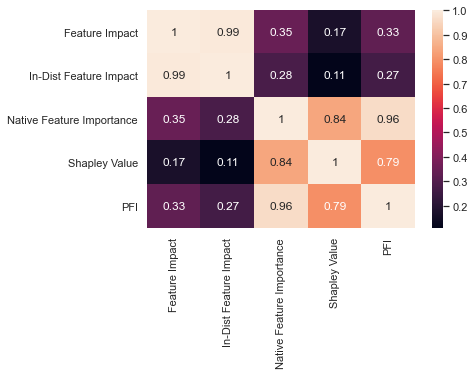

In [134]:
norm_vals = comparator\
    .build_normalized_table()\
    .iloc[:,1:]\

corr_matrix = norm_vals\
    .pipe(np.corrcoef, rowvar = False)

sn.heatmap(corr_matrix, 
           annot = True,
           yticklabels = comparator_norm_values.columns,
           xticklabels = comparator_norm_values.columns)

# To show

In [135]:
def head_and_tail(df, k):
    return df.head(k).append(df.tail(k))

In [136]:
results = comparator\
    .build_normalized_table()\
    .loc[:,['Feature', 'Feature Impact', 'Native Feature Importance']]\
    .assign(Difference = lambda x:x['Feature Impact'] - x['Native Feature Importance'])\
    .sort_values('Difference', ascending = False)\
    .pipe(head_and_tail, k = 5)\
    .reset_index(drop = True)

In [137]:
results

,Feature,Feature Impact,Native Feature Importance,Difference
0,STDs:genital herpes,10.015898,1.002309,9.013589
1,STDs:pelvic inflammatory disease,8.593629,0.156212,8.437416
2,STDs:Hepatitis B,7.412939,0.129242,7.283697
3,STDs:HPV,6.781472,0.167592,6.613880
4,STDs:molluscum contagiosum,5.504004,0.129711,5.374294
5,Smokes (years),1.860211,4.051266,-2.191056
6,Hormonal Contraceptives (years),9.424448,15.531807,-6.107360
7,Num of pregnancies,1.321620,9.980885,-8.659265
8,Number of sexual partners,0.974679,9.890679,-8.916001
9,Age,2.939706,17.668463,-14.728757


In [138]:
ice.ice_dfs['STDs:Hepatitis B']['STDs:Hepatitis B'].value_counts()

0.001328    858
1.000000    858
0.000000    858
Name: STDs:Hepatitis B, dtype: int64

In [139]:
ice.ice_dfs['STDs:Hepatitis B']['dydx'] = ice.ice_dfs['STDs:Hepatitis B'].groupby('obs')['dydx'].transform(lambda x:np.where(x.isna(), x.shift(-1), x))

In [140]:
ice.ice_dfs['STDs:Hepatitis B']

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,obs,y_pred,y_pred_centered,feature_distance,original_point,likelihood,dy,dx,dydx,dydx_abs
0,19.0,2.0,15.0,1.0,0.0,0.0,0.0,1.000000,0.250000,0.000000,...,0,0.000,0.000,0.000000,1,1.000000,NaN,NaN,21.084000,21.084000
0,19.0,2.0,15.0,1.0,0.0,0.0,0.0,1.000000,0.250000,0.000000,...,0,0.028,0.028,0.001328,0,0.988864,0.028,0.001328,21.084000,21.084000
0,19.0,2.0,15.0,1.0,0.0,0.0,0.0,1.000000,0.250000,0.000000,...,0,0.028,0.028,1.000000,0,0.000218,0.000,0.998672,0.000000,0.000000
1,19.0,3.0,15.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1,0.000,0.000,0.000000,1,1.000000,NaN,NaN,12.048000,12.048000
1,19.0,3.0,15.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1,0.016,0.016,0.001328,0,0.988864,0.016,0.001328,12.048000,12.048000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,17.0,2.0,15.0,2.0,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,856,0.000,0.000,0.000000,1,1.000000,0.000,0.001328,0.000000,0.000000
856,17.0,2.0,15.0,2.0,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,856,0.000,0.000,0.998672,0,0.000220,0.000,0.998672,0.000000,0.000000
857,20.0,2.0,18.0,1.0,1.0,13.0,7.0,0.000000,0.000000,0.000000,...,857,0.136,0.000,1.000000,0,0.000218,NaN,NaN,-4.518000,4.518000
857,20.0,2.0,18.0,1.0,1.0,13.0,7.0,0.000000,0.000000,0.000000,...,857,0.130,-0.006,0.998672,0,0.000220,-0.006,0.001328,-4.518000,4.518000


In [141]:
ice.ice_dfs['STDs:Hepatitis B'].groupby('obs').agg({'Age':'count'}).max()

Age    3
dtype: int64

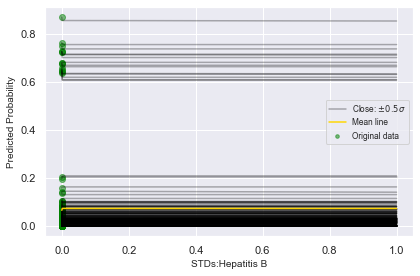

In [145]:
ice.ice_plot_single_feature('STDs:Hepatitis B', mode = 'ice')